# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient


%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Mirek\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")
api_key

'b2751ebfb4444d78884ecb721a451d25'

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)
newsapi 

In [4]:
# I have narroed the selection to sources recommended by APINews as otherwise sample would have been 10000+ articles. 

Bitcoin_headlines = newsapi.get_everything(q='bitcoin',
                                      sources='bbc-news,the-verge',
                                      domains='bbc.co.uk,techcrunch.com',
                                      from_param='2022-06-10',
                                      to='2022-01-10',
                                      language='en',
                                      sort_by='relevancy',
                                      page=2)



In [5]:
# Print total articles
print(f"Total articles about Bitcoin: {Bitcoin_headlines['totalResults']}")

# Show sample article
Bitcoin_headlines["articles"][0]


Total articles about Bitcoin: 317


{'source': {'id': 'bbc-news', 'name': 'BBC News'},
 'author': 'https://www.facebook.com/bbcnews',
 'title': 'How Gen Z is hooked on cryptocurrency and NFTs',
 'description': 'A growing number of young people are getting into crypto trading - despite the risks.',
 'url': 'https://www.bbc.co.uk/news/business-60566575',
 'urlToImage': 'https://ichef.bbci.co.uk/news/1024/branded_news/11E29/production/_123475237_brianjung.jpg',
 'publishedAt': '2022-05-17T23:05:26Z',
 'content': 'By Mariko OiAsia business correspondent\r\nImage caption, Paxton See Tow, 20, started trading crypto because of they hype around digital currencies\r\nThe lure of making a quick buck has always attracted… [+5987 chars]'}

In [6]:
# Fetch the Ethereum news articles

Ethereum_headlines = newsapi.get_everything(q='ethereum',
                                      sources='bbc-news,the-verge',
                                      domains='bbc.co.uk,techcrunch.com',
                                      from_param='2022-06-10',
                                      to='2022-01-10',
                                      language='en',
                                      sort_by='relevancy',
                                      page=2)

In [7]:
# Print total articles
print(f"Total articles about Ethereum: {Ethereum_headlines['totalResults']}")

# Show sample article
Ethereum_headlines["articles"][0]

Total articles about Ethereum: 277


{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
 'author': 'Lucas Matney',
 'title': "a16z, Coatue, USV invest in $725M developer fund for Dapper's Flow blockchain",
 'description': "The Flow blockchain launched by NBA Top Shot creator Dapper Labs is looking to onboard more crypto developers and it's built up a dedicated ecosystem fund to...",
 'url': 'https://techcrunch.com/2022/05/10/a16z-coatue-usv-invest-in-725m-developer-fund-for-dappers-flow-blockchain/',
 'urlToImage': 'https://s.yimg.com/ny/api/res/1.2/nGKOrkJonGObiX_xWImG0g--/YXBwaWQ9aGlnaGxhbmRlcjt3PTEyMDA7aD04MDA-/https://s.yimg.com/uu/api/res/1.2/Cn0OjhE3cBd8b6zXNXg4Jw--~B/aD0xMzY1O3c9MjA0ODthcHBpZD15dGFjaHlvbg--/https://media.zenfs.com/en/techcrunch_350/ee37731958e72a2be824ec68a4dc5a4d',
 'publishedAt': '2022-05-10T21:59:06Z',
 'content': "The web3 world is continuing to discover that it's a lot harder to build a developer ecosystem than it is to build a platform.\r\nThe Flow blockchain launched by NBA Top Shot crea

In [8]:
# Create the Bitcoin sentiment scores DataFrame
Bitcoin_headlines_df = pd.DataFrame.from_dict(Bitcoin_headlines["articles"])
Bitcoin_headlines_df.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'bbc-news', 'name': 'BBC News'}",https://www.facebook.com/bbcnews,How Gen Z is hooked on cryptocurrency and NFTs,A growing number of young people are getting i...,https://www.bbc.co.uk/news/business-60566575,https://ichef.bbci.co.uk/news/1024/branded_new...,2022-05-17T23:05:26Z,By Mariko OiAsia business correspondent\r\nIma...
1,"{'id': 'the-verge', 'name': 'The Verge'}",Corin Faife,A ransomware group paid the price for backing ...,After the Conti ransomware group sided with Ru...,https://www.theverge.com/2022/2/28/22955246/co...,https://cdn.vox-cdn.com/thumbor/ZUKiU-xwFaQRtC...,2022-02-28T22:11:46Z,Illustration by Carlo Cadenas / The Verge\r\n\...
2,"{'id': 'the-verge', 'name': 'The Verge'}",Corin Faife,Stablecoins are struggling to survive the cryp...,After the Terra stablecoin broke its dollar pe...,https://www.theverge.com/2022/5/12/23069232/te...,https://cdn.vox-cdn.com/thumbor/rUaR5RqYmvfihR...,2022-05-12T20:56:14Z,"Once pegged to the dollar, Terras UST coin is ..."
3,"{'id': 'bbc-news', 'name': 'BBC News'}",https://www.facebook.com/bbcnews,Record-high seizure of $5bn in stolen bitcoin,Two suspects allegedly conspired to launder th...,https://www.bbc.co.uk/news/world-us-canada-603...,https://ichef.bbci.co.uk/news/1024/branded_new...,2022-02-08T18:44:59Z,"Image source, Getty Images\r\nImage caption, A..."
4,"{'id': 'bbc-news', 'name': 'BBC News'}",https://www.facebook.com/bbcnews,What is the quantum apocalypse and should we b...,Security experts say a quantum computing leap ...,https://www.bbc.co.uk/news/technology-60144498,https://ichef.bbci.co.uk/news/1024/branded_new...,2022-01-27T01:04:38Z,By Frank GardnerBBC security correspondent\r\n...


In [9]:
Bitcoin_headlines_df_cont = Bitcoin_headlines_df ['content'].reset_index()
Bitcoin_headlines_df_cont.rename(columns={"index": "ID"})
Bitcoin_headlines_df_cont = Bitcoin_headlines_df_cont['content'].str.cat()
print (Bitcoin_headlines_df_cont)

By Mariko OiAsia business correspondent
Image caption, Paxton See Tow, 20, started trading crypto because of they hype around digital currencies
The lure of making a quick buck has always attracted… [+5987 chars]Illustration by Carlo Cadenas / The Verge

 

 As Russia’s invasion of Ukraine enters its fifth day, a coalition led by the US and Europe has mounted a coordinated response focused on financial sanc… [+6245 chars]Once pegged to the dollar, Terras UST coin is now trading at 40 cents
Illustration by Alex Castro
Its been a crushing few days for the Terra project, in a week that has been unforgiving for cryptoc… [+4159 chars]Image source, Getty Images
Image caption, A hacker allegedly made off with nearly 120,000 Bitcoin - now valued at about $5b - in 2016 after breaching the Bitfinex cryptocurrency exchange
Stolen Bit… [+1948 chars]By Frank GardnerBBC security correspondent
Image source, Getty Images
Image caption, This chip - from German firm Q.ant - is designed to facilitate opt

In [10]:
# Create the Ethereum sentiment scores DataFrame
Ethereum_headlines_df = pd.DataFrame.from_dict(Ethereum_headlines["articles"])
Ethereum_headlines_df.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Lucas Matney,"a16z, Coatue, USV invest in $725M developer fu...",The Flow blockchain launched by NBA Top Shot c...,https://techcrunch.com/2022/05/10/a16z-coatue-...,https://s.yimg.com/ny/api/res/1.2/nGKOrkJonGOb...,2022-05-10T21:59:06Z,The web3 world is continuing to discover that ...
1,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Mike Butcher,More TradFi in DeFi as Sienna Network launches...,It was last year that we covered the $11.2M fu...,https://techcrunch.com/2022/04/29/more-tradfi-...,https://s.yimg.com/uu/api/res/1.2/hUfdmx0XMsL_...,2022-04-29T08:00:38Z,It was last year that we covered the $11.2M fu...
2,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Mary Ann Azevedo,Blockchain infra startup Tenderly raises $40M ...,While both are similar developer tools for bui...,https://techcrunch.com/2022/03/02/blockchain-i...,https://s.yimg.com/ny/api/res/1.2/yLBBAshHgkXv...,2022-03-02T14:00:49Z,"Tenderly, a startup that aims to make it easie..."
3,"{'id': 'the-verge', 'name': 'The Verge'}",Nilay Patel,How Ukraine’s wide use of cryptocurrency is pl...,"Michael Chobanian, the president of the Blockc...",https://www.theverge.com/23138465/decoder-ukra...,https://cdn.vox-cdn.com/thumbor/hyxIGAl42Cl6sD...,2022-05-24T15:23:59Z,Photo Illustration by Grayson Blackmon / The V...
4,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Lucas Matney,Web3 'Proof of attendance' startup raises $10M...,If blockchains are immutable records of our di...,https://techcrunch.com/2022/01/19/web3-proof-o...,https://s.yimg.com/ny/api/res/1.2/4RitG4NkBgJg...,2022-01-19T19:38:23Z,If blockchains are immutable records of our di...


In [11]:
Ethereum_headlines_df_cont = Ethereum_headlines_df ['content'].reset_index()
Ethereum_headlines_df_cont.rename(columns={"index": "ID"})
Ethereum_headlines_df_cont.head()
Ethereum_headlines_df_cont = Ethereum_headlines_df_cont['content'].str.cat()
print (Ethereum_headlines_df_cont)

The web3 world is continuing to discover that it's a lot harder to build a developer ecosystem than it is to build a platform.
The Flow blockchain launched by NBA Top Shot creator Dapper Labs is loo… [+2596 chars]It was last year that we covered the $11.2M fundraise for Sienna Network, the privacy decentralized startup. The network is built on the Secret Network, which allows asset holders to switch to privac… [+2528 chars]Tenderly, a startup that aims to make it easier for web3 developers of all skill sets to build blockchain products, has raised $40 million in a Series B round of funding just months after closing on … [+4256 chars]Photo Illustration by Grayson Blackmon / The Verge; Photo by Oliyarnyk / CC-BY-SA-4.0

 


 With Michael Chobanian, the president of the Blockchain Association of Ukraine The terrible, unprovoked wa… [+52103 chars]If blockchains are immutable records of our digital history, what kinds of history do we want to inscribe on them? Predictably, most records thus

In [12]:
# Describe the Bitcoin Sentiment

Bitcoin_Sentiments = []

for article in Bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        Bitcoin_Sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
Bitcoin_Sentiments_df = pd.DataFrame(Bitcoin_Sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
Bitcoin_Sentiments_df = Bitcoin_Sentiments_df[cols]
Bitcoin_Sentiments_df.sort_values(by='date', ascending = False)
Bitcoin_Sentiments_df.head()

,date,text,compound,positive,negative,neutral
0,2022-05-17,By Mariko OiAsia business correspondent\r\nIma...,0.0000,0.000,0.000,1.000
1,2022-02-28,Illustration by Carlo Cadenas / The Verge\r\n\...,0.3818,0.077,0.000,0.923
2,2022-05-12,"Once pegged to the dollar, Terras UST coin is ...",-0.3612,0.000,0.065,0.935
3,2022-02-08,"Image source, Getty Images\r\nImage caption, A...",-0.0772,0.083,0.091,0.826
4,2022-01-27,By Frank GardnerBBC security correspondent\r\n...,0.3400,0.076,0.000,0.924


In [13]:
Bitcoin_Sentiments_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.00000,20.000000
mean,0.093230,0.062900,0.03800,0.899050
std,0.344022,0.058444,0.04426,0.074734
min,-0.440400,0.000000,0.00000,0.700000
25%,-0.208300,0.000000,0.00000,0.856000
50%,0.170850,0.070000,0.02000,0.923000
75%,0.366350,0.085250,0.06725,0.937500
max,0.778300,0.244000,0.15200,1.000000


In [14]:
# # Bitcoin sentiment based on compoud score 
# def get_sentiment(score):
#     """
#     Calculates the sentiment based on the compound score.
#     """
#     result = 0  # Neutral by default
#     if score >= 0.05:  # Positive
#         result = 1
#     elif score <= -0.05:  # Negative
#         result = -1

#     return result


In [15]:
# Describe the Ethereum Sentiment

Ethereum_Sentiments = []

for article in Ethereum_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        Ethereum_Sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
Ethereum_Sentiments_df = pd.DataFrame(Ethereum_Sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
Ethereum_Sentiments_df = Ethereum_Sentiments_df[cols]
Ethereum_Sentiments_df.sort_values(by='date', ascending = False)
Ethereum_Sentiments_df.head()

,date,text,compound,positive,negative,neutral
0,2022-05-10,The web3 world is continuing to discover that ...,0.3182,0.088,0.000,0.912
1,2022-04-29,It was last year that we covered the $11.2M fu...,0.3612,0.068,0.000,0.932
2,2022-03-02,"Tenderly, a startup that aims to make it easie...",0.6808,0.145,0.000,0.855
3,2022-05-24,Photo Illustration by Grayson Blackmon / The V...,-0.4767,0.000,0.103,0.897
4,2022-01-19,If blockchains are immutable records of our di...,0.0387,0.034,0.000,0.966


In [16]:
Ethereum_Sentiments_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.206950,0.069450,0.021700,0.908850
std,0.371250,0.064129,0.036053,0.065456
min,-0.526700,0.000000,0.000000,0.795000
25%,0.000000,0.000000,0.000000,0.858000
50%,0.283800,0.066000,0.000000,0.908000
75%,0.453775,0.117500,0.045750,0.948000
max,0.757900,0.205000,0.103000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum 

Q: Which coin had the highest compound score?

A: Bitcoin

Q. Which coin had the highest positive score?

A: Bitcoin

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [17]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [18]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

In [19]:
# Create a list of stopwords
stops = set(stopwords.words('english'))
print(f"Total number of stopwords: {len(stops)}")
print(stops)

Total number of stopwords: 179
{'her', 'now', "shouldn't", 'doesn', "you've", 'you', 'yours', 'herself', 'an', "wouldn't", 've', 'being', 'y', 'she', 'most', "it's", 'into', 'there', 'a', 'same', 'don', 'my', 'o', 'under', 'did', 'for', 'him', 'are', 'them', 'wouldn', 'other', 'didn', 'but', 'its', 'which', 'our', 'once', 'needn', 'me', 'hers', 'nor', 'who', 'through', 'over', 'ain', 'the', 'aren', 'itself', 'yourselves', 'does', 'than', 'as', 'these', 'couldn', "you're", 'ours', 'few', 'your', 'while', "you'll", 'himself', 'from', 'hasn', "shan't", 'down', 'when', 't', 'against', 'until', 'in', "didn't", 'out', 'further', "should've", "isn't", 'this', 'very', 'on', 'up', 's', 'had', 'm', 'have', "aren't", 'above', "mightn't", 'theirs', 'their', 'whom', 'isn', 're', 'below', 'do', 'not', "don't", 'both', "you'd", 'will', "doesn't", 'themselves', "she's", 'having', 'they', 'shouldn', 'is', 'he', 'or', 'off', 'haven', 'because', 'no', 'some', 'shan', 'of', 'i', 'should', 'd', 'been', 'ow

In [20]:
# Expand the default stopwords list if necessary
# YOUR CODE HERE!

In [21]:
# Complete the tokenizer function
def tokenizer (text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    sw = set(stopwords.words('english'))
    regex = re.compile('[^a-zA-Z ]')
    re_clean = regex.sub('', text)
    
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    tokens = [word.lower() for word in lem if word.lower() not in sw]   
    # Remove the stop words

    return  tokens    

In [22]:
# Create a new tokens column for Bitcoin

processed_BTC = tokenizer(Bitcoin_headlines_df_cont)
print(processed_BTC)

['mariko', 'oiasia', 'business', 'correspondentimage', 'caption', 'paxton', 'see', 'tow', 'started', 'trading', 'crypto', 'hype', 'around', 'digital', 'currenciesthe', 'lure', 'making', 'quick', 'buck', 'ha', 'always', 'attracted', 'charsillustration', 'carlo', 'cadenas', 'verge', 'russias', 'invasion', 'ukraine', 'enters', 'fifth', 'day', 'coalition', 'led', 'us', 'europe', 'ha', 'mounted', 'coordinated', 'response', 'focused', 'financial', 'sanc', 'charsonce', 'pegged', 'dollar', 'terras', 'ust', 'coin', 'trading', 'centsillustration', 'alex', 'castroits', 'crushing', 'day', 'terra', 'project', 'week', 'ha', 'unforgiving', 'cryptoc', 'charsimage', 'source', 'getty', 'imagesimage', 'caption', 'hacker', 'allegedly', 'made', 'nearly', 'bitcoin', 'valued', 'b', 'breaching', 'bitfinex', 'cryptocurrency', 'exchangestolen', 'bit', 'charsby', 'frank', 'gardnerbbc', 'security', 'correspondentimage', 'source', 'getty', 'imagesimage', 'caption', 'chip', 'german', 'firm', 'qant', 'designed', 'fa

In [23]:
# Create a new tokens column for Ethereum
processed_ETH = tokenizer(Ethereum_headlines_df_cont)
print(processed_ETH)

['web', 'world', 'continuing', 'discover', 'lot', 'harder', 'build', 'developer', 'ecosystem', 'build', 'platformthe', 'flow', 'blockchain', 'launched', 'nba', 'top', 'shot', 'creator', 'dapper', 'labs', 'loo', 'charsit', 'wa', 'last', 'year', 'covered', 'fundraise', 'sienna', 'network', 'privacy', 'decentralized', 'startup', 'network', 'built', 'secret', 'network', 'allows', 'asset', 'holder', 'switch', 'privac', 'charstenderly', 'startup', 'aim', 'make', 'easier', 'web', 'developer', 'skill', 'set', 'build', 'blockchain', 'product', 'ha', 'raised', 'million', 'series', 'b', 'round', 'funding', 'month', 'closing', 'charsphoto', 'illustration', 'grayson', 'blackmon', 'verge', 'photo', 'oliyarnyk', 'ccbysa', 'michael', 'chobanian', 'president', 'blockchain', 'association', 'ukraine', 'terrible', 'unprovoked', 'wa', 'charsif', 'blockchains', 'immutable', 'record', 'digital', 'history', 'kind', 'history', 'want', 'inscribe', 'predictably', 'record', 'thus', 'far', 'transaction', 'data', '

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [24]:
from collections import Counter
from nltk import ngrams

In [25]:
# Generate the Bitcoin N-grams where N=2
Bitcoin_counts = Counter(ngrams(processed_BTC, n=2))
print(dict(Bitcoin_counts))

{('mariko', 'oiasia'): 1, ('oiasia', 'business'): 1, ('business', 'correspondentimage'): 1, ('correspondentimage', 'caption'): 1, ('caption', 'paxton'): 1, ('paxton', 'see'): 1, ('see', 'tow'): 1, ('tow', 'started'): 1, ('started', 'trading'): 1, ('trading', 'crypto'): 1, ('crypto', 'hype'): 1, ('hype', 'around'): 1, ('around', 'digital'): 1, ('digital', 'currenciesthe'): 1, ('currenciesthe', 'lure'): 1, ('lure', 'making'): 1, ('making', 'quick'): 1, ('quick', 'buck'): 1, ('buck', 'ha'): 1, ('ha', 'always'): 1, ('always', 'attracted'): 1, ('attracted', 'charsillustration'): 1, ('charsillustration', 'carlo'): 1, ('carlo', 'cadenas'): 1, ('cadenas', 'verge'): 1, ('verge', 'russias'): 1, ('russias', 'invasion'): 1, ('invasion', 'ukraine'): 1, ('ukraine', 'enters'): 1, ('enters', 'fifth'): 1, ('fifth', 'day'): 1, ('day', 'coalition'): 1, ('coalition', 'led'): 1, ('led', 'us'): 1, ('us', 'europe'): 1, ('europe', 'ha'): 1, ('ha', 'mounted'): 1, ('mounted', 'coordinated'): 1, ('coordinated', 

In [26]:
# Generate the Ethereum N-grams where N=2
Ethereum_counts = Counter(ngrams(processed_ETH, n=2))
print(dict(Ethereum_counts))

{('web', 'world'): 1, ('world', 'continuing'): 1, ('continuing', 'discover'): 1, ('discover', 'lot'): 1, ('lot', 'harder'): 1, ('harder', 'build'): 1, ('build', 'developer'): 1, ('developer', 'ecosystem'): 1, ('ecosystem', 'build'): 1, ('build', 'platformthe'): 1, ('platformthe', 'flow'): 1, ('flow', 'blockchain'): 1, ('blockchain', 'launched'): 1, ('launched', 'nba'): 1, ('nba', 'top'): 1, ('top', 'shot'): 1, ('shot', 'creator'): 1, ('creator', 'dapper'): 1, ('dapper', 'labs'): 1, ('labs', 'loo'): 1, ('loo', 'charsit'): 1, ('charsit', 'wa'): 1, ('wa', 'last'): 1, ('last', 'year'): 1, ('year', 'covered'): 1, ('covered', 'fundraise'): 1, ('fundraise', 'sienna'): 1, ('sienna', 'network'): 1, ('network', 'privacy'): 1, ('privacy', 'decentralized'): 1, ('decentralized', 'startup'): 1, ('startup', 'network'): 1, ('network', 'built'): 1, ('built', 'secret'): 1, ('secret', 'network'): 1, ('network', 'allows'): 1, ('allows', 'asset'): 1, ('asset', 'holder'): 1, ('holder', 'switch'): 1, ('switc

In [27]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [28]:
# Use token_count to get the top 10 words for Bitcoin
print(dict(Bitcoin_counts.most_common(10)))

{('source', 'getty'): 6, ('charsimage', 'source'): 4, ('jack', 'dorsey'): 3, ('getty', 'imagesimage'): 2, ('imagesimage', 'caption'): 2, ('charsillustration', 'alex'): 2, ('alex', 'castro'): 2, ('castro', 'verge'): 2, ('nonfungible', 'token'): 2, ('ceo', 'jack'): 2}


In [29]:
# Use token_count to get the top 10 words for Ethereum
print(dict(Ethereum_counts.most_common(10)))

{('ha', 'raised'): 2, ('charsimage', 'source'): 2, ('source', 'getty'): 2, ('announced', 'ha'): 2, ('inbox', 'every'): 2, ('web', 'world'): 1, ('world', 'continuing'): 1, ('continuing', 'discover'): 1, ('discover', 'lot'): 1, ('lot', 'harder'): 1}


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

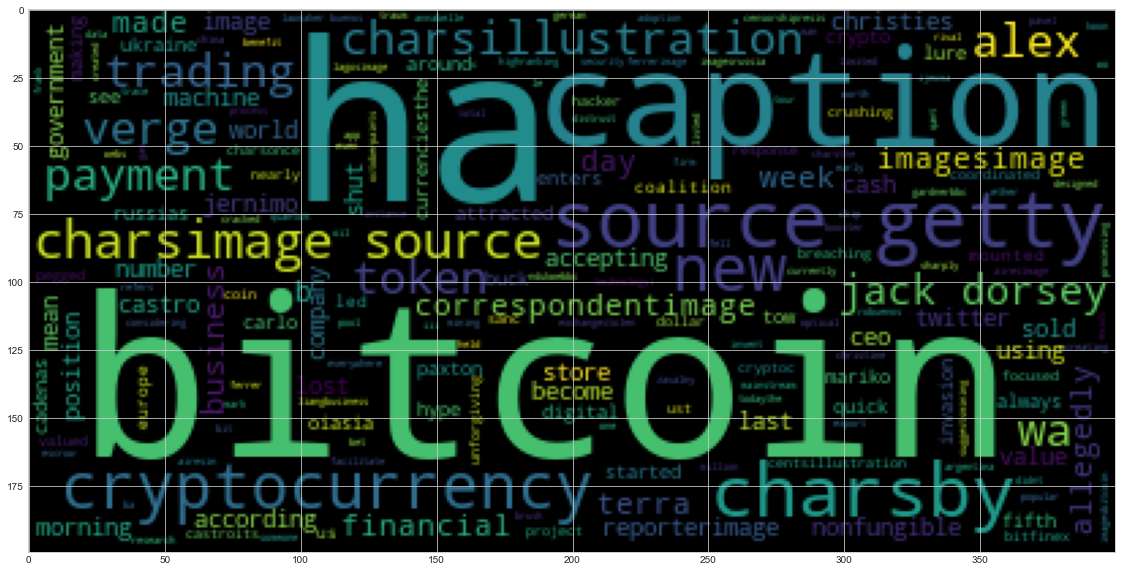

In [31]:
# Generate the Bitcoin word cloud

BTC_string = ' '.join(processed_BTC)
input_words = BTC_string

wc = WordCloud().generate(input_words)
plt.imshow(wc)

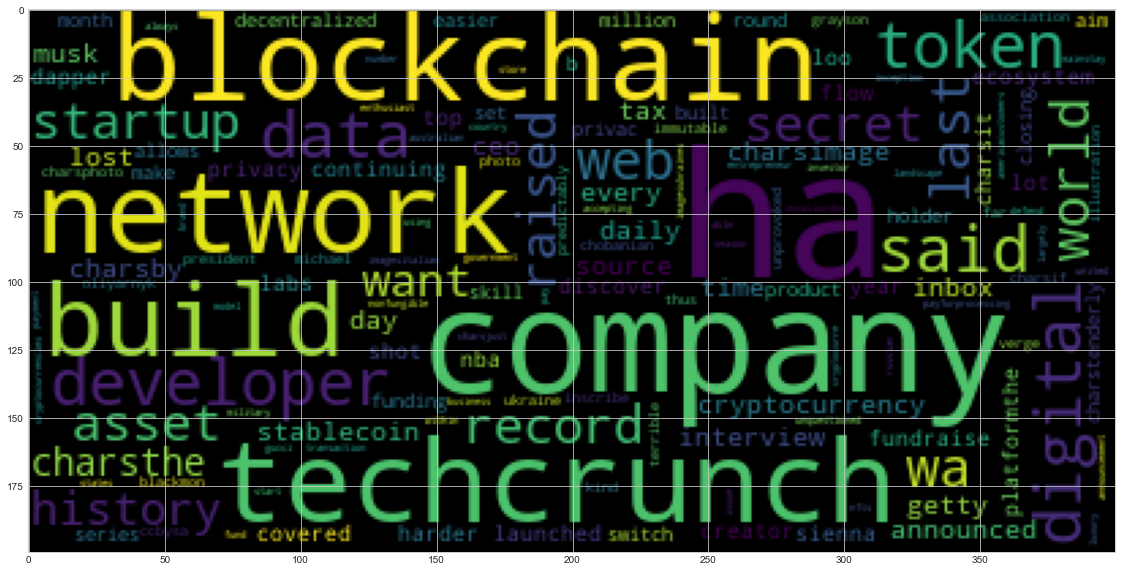

In [32]:
# Generate the Ethereum word cloud
ETH_string = ' '.join(processed_ETH)
input_words = ETH_string

wc = WordCloud().generate(input_words)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [33]:
import spacy
from spacy import displacy

In [34]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [35]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [36]:
# Concatenate all of the Bitcoin text together
# Answer, I have done it in Sentiment analysis section as function required string rather than dataframe , ref to below df creating a df. 
# Ethereum_headlines_df_cont = Ethereum_headlines_df_cont['content'].str.cat()


In [37]:
# Run the NER processor on all of the text

doc_BTC = nlp(Bitcoin_headlines_df_cont)
# Add a title to the document
doc_BTC.user_data["title"] = "Bitcoin Name Entity Recognition"

In [38]:
# Render the visualization

displacy.render(doc_BTC, style='ent')

In [42]:
# List all Entities
doc_BTC = nlp(doc_BTC)

for ent in doc_BTC.ents:
    print(ent.label_, ent.text)      

unique_BTC = ['doc_BTC']
unique_BTC = list(dict.fromkeys('unique_BTC'))



PERSON Mariko OiAsia
PERSON Paxton See Tow
DATE 20
PERSON Carlo Cadenas
ORG Verge
GPE Russia
GPE Ukraine
DATE its fifth day
GPE US
LOC Europe
ORG Terras UST
MONEY 40 cents
ORG Alex Castro
DATE a crushing few days
PERSON Terra
DATE a week
ORG Getty Images
Image
CARDINAL nearly 120,000
MONEY about $5b -
DATE 2016
ORG Bitfinex
PERSON Stolen Bit
PERSON Frank GardnerBBC security
ORG Getty Images
Image
NORP German
ORG quantum
CARDINAL chars]By
ORG Annabelle LiangBusiness
ORG Getty Images

GPE Russia
NORP Bitcoin
PERSON Alex Castro
PERSON Jack Dorsey
PERSON Alex Castro
ORG Verge
MONEY $11 million
ORG Ijeoma NdukweBBC Business
GPE Lagos
ORG Christies Images Limited 2022
ORG Christie's
DATE last October

MONEY $40,000 mark
TIME early morning
DATE today
TIME this morning
PERSON Christine RoBuenos Aires
ORG Jerónimo Ferrer
Image
FAC Jerónimo Ferrer
ORG Buenos Aires
GPE Argentina
ORG Getty Images
Bitcoin
GPE China
DATE 2014
ORG Mobile World Congress
PERSON Satya Nadella
ORG Microsoft
ORG Server &a

In [43]:
# get a tupple of all entity labels
ent_tupple = nlp.get_pipe('ner').labels

# printing the explanation of all entity labels
for ent in ent_tupple:
    print(ent + ' - ' + spacy.explain(ent))

CARDINAL - Numerals that do not fall under another type
DATE - Absolute or relative dates or periods
EVENT - Named hurricanes, battles, wars, sports events, etc.
FAC - Buildings, airports, highways, bridges, etc.
GPE - Countries, cities, states
LANGUAGE - Any named language
LAW - Named documents made into laws.
LOC - Non-GPE locations, mountain ranges, bodies of water
MONEY - Monetary values, including unit
NORP - Nationalities or religious or political groups
ORDINAL - "first", "second", etc.
ORG - Companies, agencies, institutions, etc.
PERCENT - Percentage, including "%"
PERSON - People, including fictional
PRODUCT - Objects, vehicles, foods, etc. (not services)
QUANTITY - Measurements, as of weight or distance
TIME - Times smaller than a day
WORK_OF_ART - Titles of books, songs, etc.


---

### Ethereum NER

In [44]:
# Concatenate all of the Ethereum text together
# Ysimilar to Bitcoin, df has been created in sentiment analysis. 

In [46]:
# Run the NER processor on all of the text
doc_ETH = nlp(Ethereum_headlines_df_cont)
# Add a title to the document
doc_ETH.user_data["title"] = "Ethereum Name Entity Recognition"


In [47]:
# Render the visualization
displacy.render(doc_ETH, style='ent')

In [49]:
# List all Entities
doc_ETH = nlp(doc_ETH)

for ent in doc_ETH.ents:
    
    print(ent.label_, ent.text)

    #result = df[['Fee','Discount']].aggregate('sum')
print(result)

counting = doc_ETH.groupby(ent.label_)


ORG Flow
ORG NBA
PERSON Dapper Labs
DATE last year
MONEY $11.2M
PERSON Sienna Network
PRODUCT the Secret Network
MONEY $40 million
EVENT Series
DATE just months
PERSON Grayson Blackmon
ORG Oliyarnyk / CC-BY-SA-4.0
PERSON Michael Chobanian
ORG the Blockchain Association of Ukraine
ORG Getty Images

NORP Italian
PERSON Gucci
GPE America
ORG Getty Images

ORG Ukraine
NORP Russian
GPE the United States
NORP Australian
ORG CTC
ORG TechCrunchs
TIME 3 p.m. PST
ORG Daily Crunch
DATE Monday, February 7, 2022
GPE DeFi
ORG the Future of Programmable Money
DATE March 30, 2022
ORG Circle
ORG Concord Acquisition Corp
ORG Nvidia
DATE today
ORG chars]Crypto.com
PERSON Kris Marszalek
CARDINAL 400
ORG Bloomberg TV
DATE Wednesday
PERSON Cry
DATE May 20th
DATE one day
GPE Zambia
DATE last weeks
PERSON Peter HoskinsBusiness
ORG Apple
PERSON Tim Cook
NORP Saudi
PERSON +1829 chars]In
ORG TechCrunch
ORG Tesla
PERSON Kimbal Musk
PERSON Elon Musk
ORG The TechCrunch Exchange
DATE weekly
DATE daily
DATE Saturday


NameError: name 'result' is not defined

---